# Create LinearRegression model for Data of 5 days

In [35]:
from pandas import read_csv
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import datetime   
from pandas import Series
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Create Optimal Dataframe

In [36]:
filename = 'feeds (2).csv'
# TODO: read the csv file
#INSERT CODE HERE
dataset = read_csv(filename,parse_dates = True)
dataset['date'] = pd.to_datetime(dataset['created_at']).dt.date
dataset['time'] = pd.to_datetime(dataset['created_at']).dt.time
dataset.drop(dataset.columns[[4,5,6,7]], axis = 1, inplace = True)
dataset=dataset.mask(dataset.eq('None')).dropna()
dataset.eq("None").any(1)
dataset=dataset.dropna()
dataset.rename(columns = {'field1':'Temperature', 'field2':'Humidity'}, inplace = True)
dataset['Hour']=dataset['created_at'].str[11:13]
dataset['Month'] = dataset['created_at'].str[5:7]
dataset['Day'] = dataset['created_at'].str[8:10]
dataset['hour_half'] = round(dataset['created_at'].str[14:16].astype(int)/30)
dataset=dataset.astype({'Temperature':'float32','Humidity':'float32','Hour':'int','Day':'int'})
dataset

C:\Users\Ravi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,created_at,entry_id,Temperature,Humidity,date,time,Hour,Month,Day,hour_half
0,2022-08-01T04:32:35+00:00,1,26.299999,53.599998,2022-08-01,04:32:35,4,08,1,1.0
1,2022-08-01T04:32:51+00:00,2,26.299999,53.599998,2022-08-01,04:32:51,4,08,1,1.0
2,2022-08-01T04:33:08+00:00,3,26.299999,53.099998,2022-08-01,04:33:08,4,08,1,1.0
3,2022-08-01T04:33:23+00:00,4,26.299999,53.599998,2022-08-01,04:33:23,4,08,1,1.0
4,2022-08-01T04:33:38+00:00,5,26.299999,53.599998,2022-08-01,04:33:38,4,08,1,1.0
...,...,...,...,...,...,...,...,...,...,...
16233,2022-08-05T04:07:26+00:00,16234,27.900000,50.700001,2022-08-05,04:07:26,4,08,5,0.0
16234,2022-08-05T04:07:42+00:00,16235,28.000000,50.700001,2022-08-05,04:07:42,4,08,5,0.0
16235,2022-08-05T04:07:57+00:00,16236,27.900000,50.500000,2022-08-05,04:07:57,4,08,5,0.0
16236,2022-08-05T04:08:13+00:00,16237,27.900000,50.599998,2022-08-05,04:08:13,4,08,5,0.0


In [37]:
dataset.describe(percentiles=None)

,entry_id,Temperature,Humidity,Hour,Day,hour_half
count,15482.000000,15482.000000,15482.000000,15482.000000,15482.000000,15482.000000
mean,7932.689898,26.464510,52.525379,11.366296,2.450523,0.984498
std,4711.595499,1.688983,6.070473,7.479506,1.291218,0.716625
min,1.000000,3.700000,4.900000,0.000000,1.000000,0.000000
25%,3874.250000,24.900000,49.900002,4.000000,1.000000,0.000000
50%,7744.500000,26.400000,52.099998,12.000000,2.000000,1.000000
75%,11865.750000,27.799999,54.099998,18.000000,4.000000,1.000000
max,16238.000000,29.799999,88.599998,23.000000,5.000000,2.000000


Plot graph for obtained data

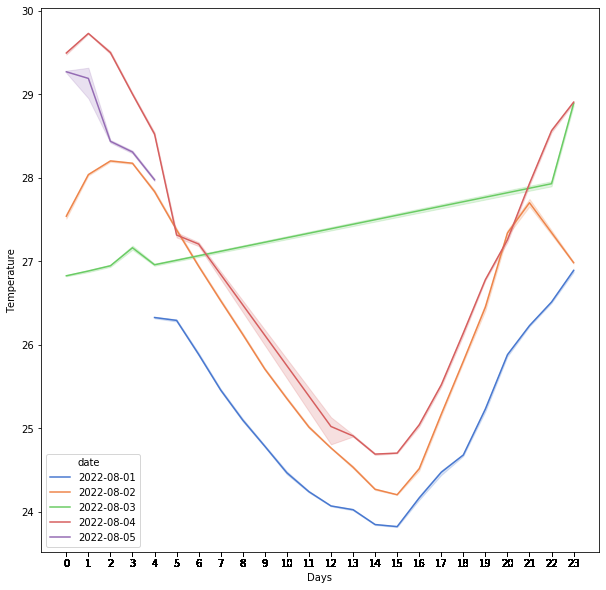

In [38]:
plt.subplots(figsize=(10,10))
ax=sb.lineplot(data = dataset, x = dataset['Hour'], y = dataset['Temperature'], hue=dataset['date'], palette="muted")
ax.set_xlabel("Days")
ax.set_xticks(dataset['Hour'].values)
ax.set_ylabel("Temperature")
ax

Create a model

In [39]:
X = dataset[["Day","Hour"]]
Y = dataset["Temperature"]
model = LinearRegression()
#train_data = dataset[:int((len(dataset)+1)*.8)]
#test_data = dataset[int(len(dataset)*.8)+1:]
#r=train_data[["Day","Hour"]].values    
#z=train_data["Temperature"].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=7)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = model.predict(X_test)
y_pred
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_pred))
print("Coefficient of Determination:", r2_score(Y_test, y_pred))
print("Explain variance score = ", explained_variance_score(Y_test,y_pred))
print("Median absolute error = ", median_absolute_error(Y_test,y_pred))

Model Coefficients: [ 0.75399296 -0.04644088]
Mean Absolute Error: 1.0835506582407912
Coefficient of Determination: 0.40129282559164325
Explain variance score =  0.40142443913581216
Median absolute error =  1.0455213942934591


Plot a graph for actual versus predicted values






Text(0, 0.5, 'Temperature')

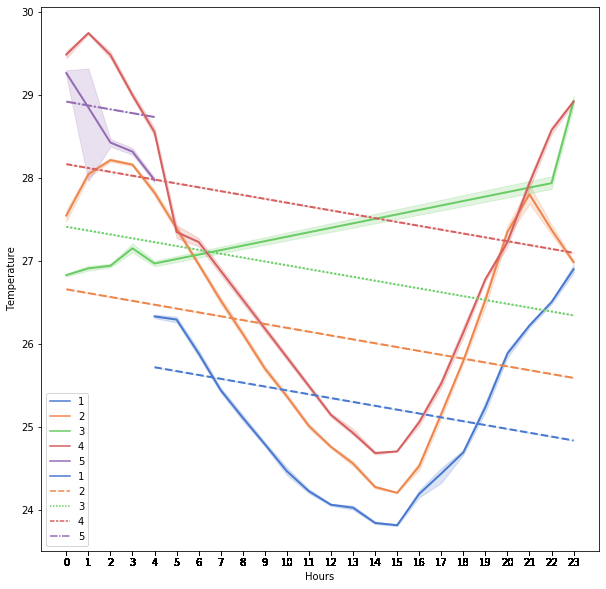

In [41]:
plt.subplots(figsize=(10,10))
sb.lineplot(x = X_test['Hour'].values, y = Y_test.values, hue=X_test['Day'].values, palette="muted",linewidth=2,dashes=False)
ax=sb.lineplot(x = X_test['Hour'].values, y = y_pred,hue = X_test['Day'].values,style = X_test['Day'].values, linewidth=2,palette="muted")
ax.lines[10].set_linestyle("--")
ax.set_xlabel("Hours")
ax.set_xticks(dataset['Hour'].values)
ax.set_ylabel("Temperature")

# Create LinearRegression model for Data of 10 days

In [42]:
filename = 'feeds (4).csv'
# TODO: read the csv file
#INSERT CODE HERE
dataset = read_csv(filename,parse_dates = True)
dataset['date'] = pd.to_datetime(dataset['created_at']).dt.date
dataset['time'] = pd.to_datetime(dataset['created_at']).dt.time
dataset.drop(dataset.columns[[4,5,6,7]], axis = 1, inplace = True)
dataset=dataset.mask(dataset.eq('None')).dropna()
dataset.eq("None").any(1)
dataset=dataset.dropna()
dataset.rename(columns = {'field1':'Temperature', 'field2':'Humidity'}, inplace = True)
dataset['Hour']=dataset['created_at'].str[11:13]
dataset['Month'] = dataset['created_at'].str[5:7]
dataset['Day'] = dataset['created_at'].str[8:10]
dataset['hour_half'] = round(dataset['created_at'].str[14:16].astype(int)/30)
dataset=dataset.astype({'Temperature':'float32','Humidity':'float32'})
dataset

C:\Users\Ravi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,created_at,entry_id,Temperature,Humidity,date,time,Hour,Month,Day,hour_half
0,2022-08-01T04:32:35+00:00,1,26.299999,53.599998,2022-08-01,04:32:35,04,08,01,1.0
1,2022-08-01T04:32:51+00:00,2,26.299999,53.599998,2022-08-01,04:32:51,04,08,01,1.0
2,2022-08-01T04:33:08+00:00,3,26.299999,53.099998,2022-08-01,04:33:08,04,08,01,1.0
3,2022-08-01T04:33:23+00:00,4,26.299999,53.599998,2022-08-01,04:33:23,04,08,01,1.0
4,2022-08-01T04:33:38+00:00,5,26.299999,53.599998,2022-08-01,04:33:38,04,08,01,1.0
...,...,...,...,...,...,...,...,...,...,...
37398,2022-08-11T16:29:18+00:00,37399,23.299999,52.200001,2022-08-11,16:29:18,16,08,11,1.0
37399,2022-08-11T16:29:33+00:00,37400,23.299999,52.200001,2022-08-11,16:29:33,16,08,11,1.0
37400,2022-08-11T16:29:49+00:00,37401,23.299999,52.200001,2022-08-11,16:29:49,16,08,11,1.0
37401,2022-08-11T16:30:05+00:00,37402,23.299999,52.200001,2022-08-11,16:30:05,16,08,11,1.0


In [43]:
X_1 = dataset[["Day","Hour"]]
Y_1 = dataset["Temperature"]
model_1 = LinearRegression()
#train_data = dataset[:int((len(dataset)+1)*.8)]
#test_data = dataset[int(len(dataset)*.8)+1:]
#r=train_data[["Day","Hour"]].values    
#z=train_data["Temperature"].values
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_1,Y_1,test_size=0.20, random_state=7)
model_1.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_1 = model_1.predict(X_test_1)
print("Model Coefficients:", model_1.coef_)
print("Mean Absolute Error:", mean_absolute_error(Y_test_1, y_pred_1))
print("Coefficient of Determination:", r2_score(Y_test_1, y_pred_1))
print("Explain variance score = ", explained_variance_score(Y_test_1,y_pred_1))
print("Median absolute error = ", median_absolute_error(Y_test_1,y_pred_1))

Model Coefficients: [-0.13701999 -0.09140082]
Mean Absolute Error: 1.3043918832657944
Coefficient of Determination: 0.17428681556895442
Explain variance score =  0.17429493839574917
Median absolute error =  1.299012196767027


# Create PolyRegression model

In [46]:
import numpy as np

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [48]:
x=np.array(X_train)
x.shape
poly_features = poly.fit_transform(x)

In [49]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
poly_features_1 = poly.fit_transform(X_test)
y_predicted = poly_reg_model.predict(poly_features_1)

Text(0, 0.5, 'Temperature')

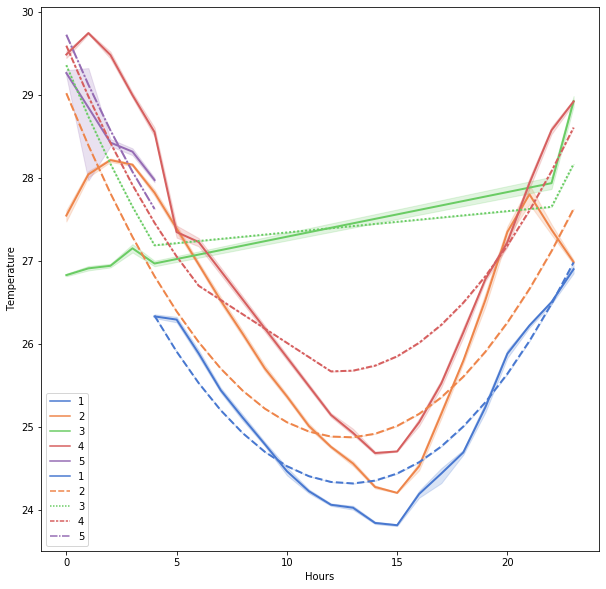

In [55]:
plt.subplots(figsize=(10,10))
sb.lineplot(x = X_test['Hour'].values, y = Y_test.values, hue=X_test['Day'].values, palette="muted",linewidth=2,dashes=False)
ax=sb.lineplot(x = X_test['Hour'].values, y = y_predicted,hue = X_test['Day'].values,style = X_test['Day'].values, linewidth=2,palette="muted")
ax.lines[10].set_linestyle("--")
ax.set_xlabel("Hours")
ax.set_ylabel("Temperature")

In [56]:

print("Model Coefficients:", poly_reg_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_predicted))
print("Coefficient of Determination:", r2_score(Y_test, y_predicted))
print("Explain variance score = ", explained_variance_score(Y_test,y_predicted))
print("Median absolute error = ", median_absolute_error(Y_test,y_predicted))

Model Coefficients: [ 0.59489197 -0.67262685 -0.051415    0.00886777  0.02583668]
Mean Absolute Error: 0.5491167130123926
Coefficient of Determination: 0.7683917272619742
Explain variance score =  0.768407858909326
Median absolute error =  0.40198869461419307


In [54]:
dataset['Hour'].values

array(['04', '04', '04', ..., '16', '16', '16'], dtype=object)